Back to the main [Index](../index.ipynb)

## Simple Example

This shows how to set up a simple model in Tellurium and solve it as an ODE. Tellurium uses a human-readable representation of SBML models called Antimony. The Antimony code for this example contains a single reaction with associated kinetics. After creating the Antimony string, use the `loada` function to load it into the simulator.

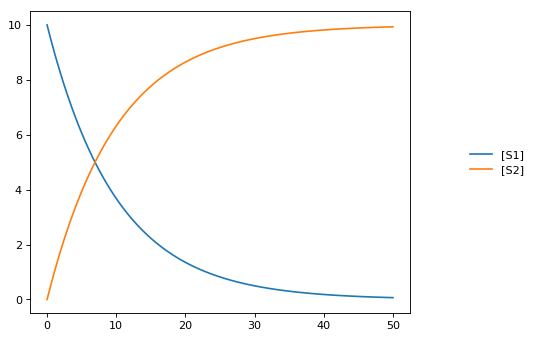

In [1]:
import tellurium as te
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
r.simulate(0, 50, 100)
r.plot();

## More Complex Example

Tellurium can also handle stochastic models. This example shows how to select Tellurium's stochastic solver. The underlying simulation engine used by Tellurium implements a Gibson direct method for simulating this model.

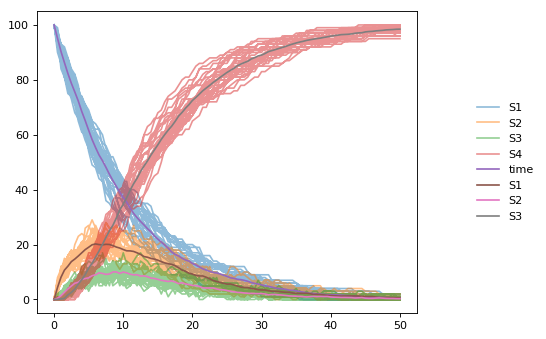

In [2]:
import tellurium as te
import numpy as np

r = te.loada('''
    J1: S1 -> S2;  k1*S1; 
    J2: S2 -> S3; k2*S2 - k3*S3
    # J2_1: S2 -> S3; k2*S2
    # J2_2: S3 -> S2; k3*S3;
    J3: S3 -> S4; k4*S3;

    k1 = 0.1; k2 = 0.5; k3 = 0.5; k4 = 0.5;
    S1 = 100;
''')

# use a stochastic solver
r.integrator = 'gillespie'
r.integrator.seed = 1234
# selections specifies the output variables in a simulation
selections = ['time'] + r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()
r.integrator.variable_step_size = False

# run repeated simulation
Ncol = len(r.selections)
Nsim = 30
points = 101
s_sum = np.zeros(shape=[points, Ncol])
#s_sum = r.simulate(0, 50, points, selections=selections)
for k in range(Nsim):
    r.resetToOrigin()
    s = r.simulate(0, 50, points, selections=selections)
    s_sum += s
    # no legend, do not show
    r.plot(s, alpha=0.5, show=False)
#r.show()
# add mean curve, legend, show everything and set labels, titels, ...
te.plot(s[:,0], s_sum[:,1:]/Nsim, colnames=selections, title="Stochastic simulation", xtitle="time", ytitle="concentration")